In [105]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# leitura do arquivo de treino
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/train.csv'
df = pd.read_csv(url)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [107]:
# verificação das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
# criação das listas das colunas quantitativas e qualitativas
qualitative = [column for column in df.columns if df.dtypes[column] == object]
quantitative = [column for column in df.columns if df.dtypes[column] != object]
quantitative.remove('SalePrice')
quantitative.remove('Id')

In [109]:
# criação dos dataframes com essas informações
qualitative_columns = pd.DataFrame(qualitative)
qualitative_columns.columns = ['qualitativas']

quantitative_columns = pd.DataFrame(quantitative)
quantitative_columns.columns = ['quantitativas']

In [110]:
# marcando valores vazios nas colunas qualitativas como missing
for column in qualitative:
    df[column] = df[column].astype('category')
    if df[column].isnull().any():
        df[column] = df[column].cat.add_categories(['MISSING'])
        df[column] = df[column].fillna('MISSING')

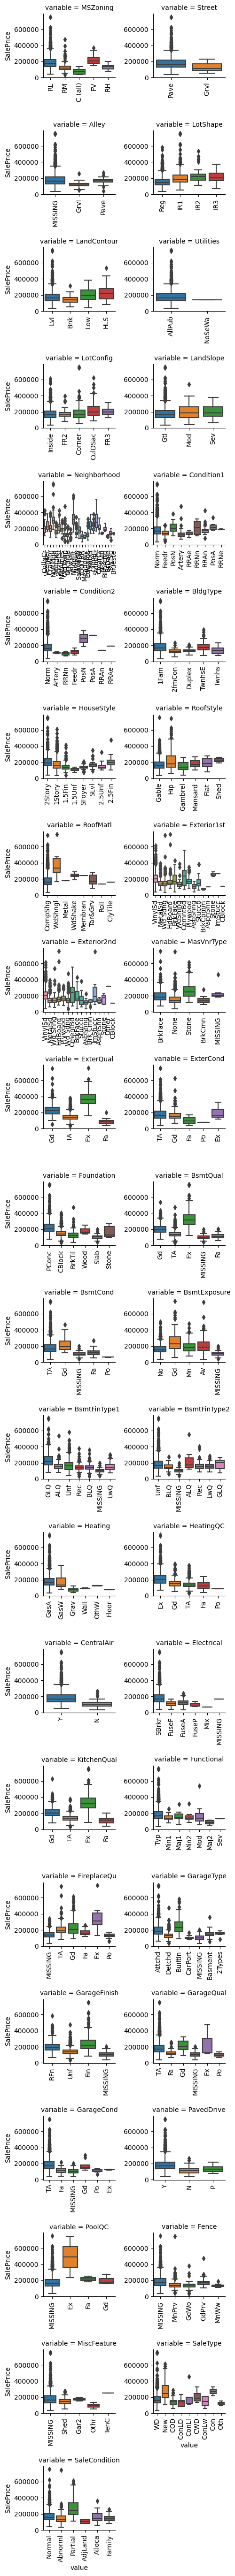

In [111]:
# Criação do boxplot para visualização da interação dos valores categóricos com o valor de venda do imóvel
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

df_melt = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative)
gridmap = sns.FacetGrid(df_melt, col="variable",  col_wrap=2, sharex=False, sharey=False, height=2.5)
gridmap = gridmap.map(boxplot, "value", "SalePrice")

In [112]:
# criação do arquivo excel para estudo próprio

# excel_path = '../Dados/exploracao.xlsx'
# with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
#     workbook = writer.book

#     qualitative_columns.to_excel(writer, sheet_name='qualitativas', index=False, startcol=1, startrow=1)
#     quantitative_columns.to_excel(writer, sheet_name='quantitativas',index=False, startcol=1, startrow=1)


In [113]:
# criação da coluna que indica se o imóvel possui mais de um andar
def add_columns(dataframe):
    dataframe['Has2ndFlr'] = dataframe['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

    return dataframe

df = add_columns(df)

In [114]:
# remoção de todas as colunas indesejadas da base de dados
def remove_columns(dataframe, sale_price=True):
    desired_columns = [
    'OverallQual',
    '1stFlrSF',
    'GrLivArea',
    'FullBath',
    'TotRmsAbvGrd',
    'GarageArea',
    'YearBuilt',
    'Has2ndFlr',
    'CentralAir',
    'SaleCondition',
    'SaleType',
    'KitchenQual',
    'PoolQC',
    'Neighborhood'
    ]
    if sale_price:
        desired_columns.append('SalePrice')
    
    dataframe = dataframe[desired_columns].copy()
    return dataframe


df = remove_columns(df)

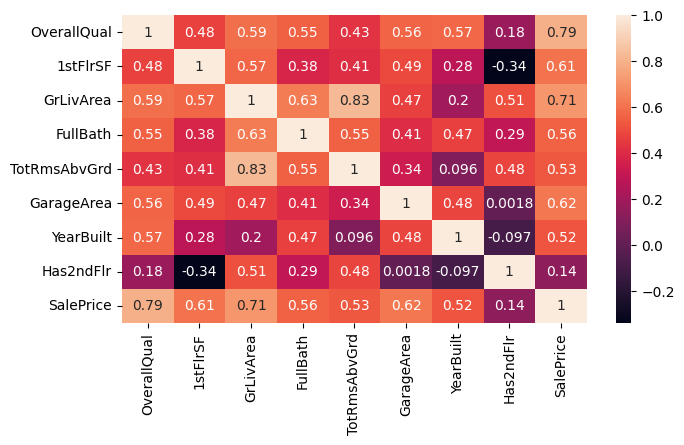

In [115]:
# teste de correlação utilizando as variáveis quantitativas que aparentam ter maior impacto
corrmat = df.corr(numeric_only=True)
plt.figure(figsize=[7.5, 4])
sns.heatmap(corrmat, annot=True)
plt.show()

In [116]:
# criação de colunas dummies para os valores categóricos que aparentam ter maior correlação com o preço do imóvel
def dummies(dataframe):
    dataframe = pd.get_dummies(dataframe, columns=['Neighborhood','CentralAir', 'KitchenQual', 'PoolQC', 'SaleType', 'SaleCondition'])

    return dataframe

df = dummies(df)

In [117]:
# imports para geração do modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# separação de X e y, e de treino e teste
train_data = df.copy()
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [118]:
# predição do modelo de teste, e resultados
y_pred = reg.predict(X_test)

print('R²', reg.score(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R² 0.8041741021604827
RMSE: 34110.60786283768


In [119]:
# leitura do arquivo de teste
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/test.csv'
test_df = pd.read_csv(url)

In [120]:
# adequação da base de dados teste
for column in qualitative:
    test_df[column] = test_df[column].astype('category')
    if test_df[column].isnull().any():
        test_df[column] = test_df[column].cat.add_categories(['MISSING'])
        test_df[column] = test_df[column].fillna('MISSING')

test_df = add_columns(test_df)
test_df = remove_columns(test_df, sale_price=False)

test_df = dummies(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1459 non-null   int64  
 1   1stFlrSF               1459 non-null   int64  
 2   GrLivArea              1459 non-null   int64  
 3   FullBath               1459 non-null   int64  
 4   TotRmsAbvGrd           1459 non-null   int64  
 5   GarageArea             1458 non-null   float64
 6   YearBuilt              1459 non-null   int64  
 7   Has2ndFlr              1459 non-null   int64  
 8   Neighborhood_Blmngtn   1459 non-null   uint8  
 9   Neighborhood_Blueste   1459 non-null   uint8  
 10  Neighborhood_BrDale    1459 non-null   uint8  
 11  Neighborhood_BrkSide   1459 non-null   uint8  
 12  Neighborhood_ClearCr   1459 non-null   uint8  
 13  Neighborhood_CollgCr   1459 non-null   uint8  
 14  Neighborhood_Crawfor   1459 non-null   uint8  
 15  Neig

In [121]:
# existe um valor vazio, completando com a média do valor da coluna para adequar ao modelo de entrega
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [122]:
# para se adequar ao padrão da regressão linear, algumas colunas foram criadas, e outras removidas
test_df = test_df.drop('KitchenQual_MISSING', axis=1)
test_df = test_df.drop('SaleType_MISSING', axis=1)
test_df['PoolQC_Fa'] = 0
test_df['Neighborhood_Blmngtn'] = 0
test_df['Neighborhood_Blueste'] = 0
test_df['Neighborhood_BrDale'] = 0
test_df['Neighborhood_BrkSide'] = 0
test_df['Neighborhood_ClearCr'] = 0
test_df['Neighborhood_CollgCr'] = 0
test_df['Neighborhood_Crawfor'] = 0
test_df['Neighborhood_Edwards'] = 0
test_df['Neighborhood_Gilbert'] = 0
test_df['Neighborhood_IDOTRR'] = 0
test_df['Neighborhood_MeadowV'] = 0
test_df['Neighborhood_Mitchel'] = 0
test_df['Neighborhood_NAmes'] = 0
test_df['Neighborhood_NPkVill'] = 0
test_df['Neighborhood_NWAmes'] = 0
test_df['Neighborhood_NoRidge'] = 0
test_df['Neighborhood_NridgHt'] = 0
test_df['Neighborhood_OldTown'] = 0
test_df['Neighborhood_SWISU'] = 0
test_df['Neighborhood_Sawyer'] = 0
test_df['Neighborhood_SawyerW'] = 0
test_df['Neighborhood_Somerst'] = 0
test_df['Neighborhood_StoneBr'] = 0
test_df['Neighborhood_Timber'] = 0
test_df['Neighborhood_Veenker'] = 0

In [123]:
# base de dados foi reorganizada para ficar na mesma ordem em que foi feita a regressão
test_df = test_df[['OverallQual', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'GarageArea', 'YearBuilt', 'Has2ndFlr',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'CentralAir_N', 'CentralAir_Y',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_MISSING', 'SaleType_COD',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']]

In [124]:
# uso do modelo para obtenção dos resultados
y_pred = reg.predict(test_df)
y_pred

array([138824.36012393, 173023.91397188, 165246.96714479, ...,
       140129.61207609, 130166.83920175, 218685.69350932])

In [125]:
# inclusão dos resultados na base de dados de teste
test_df['SalePrice'] = y_pred

In [126]:
test_df

,OverallQual,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,YearBuilt,Has2ndFlr,Neighborhood_Blmngtn,Neighborhood_Blueste,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,5,896,896,1,5,730.0,1961,0,0,0,...,0,0,1,0,0,0,0,1,0,138824.360124
1,6,1329,1329,1,6,312.0,1958,0,0,0,...,0,0,1,0,0,0,0,1,0,173023.913972
2,5,928,1629,2,6,482.0,1997,1,0,0,...,0,0,1,0,0,0,0,1,0,165246.967145
3,6,926,1604,2,7,470.0,1998,1,0,0,...,0,0,1,0,0,0,0,1,0,185032.554444
4,8,1280,1280,2,5,506.0,1992,0,0,0,...,0,0,1,0,0,0,0,1,0,208288.255460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,546,1092,1,5,0.0,1970,1,0,0,...,0,0,1,0,0,0,0,1,0,99768.725714
1455,4,546,1092,1,6,286.0,1970,1,0,0,...,0,0,1,1,0,0,0,0,0,94078.850288
1456,5,1224,1224,1,7,576.0,1960,0,0,0,...,0,0,1,1,0,0,0,0,0,140129.612076
1457,5,970,970,1,6,0.0,1992,0,0,0,...,0,0,1,0,0,0,0,1,0,130166.839202


In [127]:
# criação da coluna Id para se adequar ao padrão da entrega
test_df['Id'] = test_df.index + 1461
test_df

,OverallQual,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,YearBuilt,Has2ndFlr,Neighborhood_Blmngtn,Neighborhood_Blueste,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Id
0,5,896,896,1,5,730.0,1961,0,0,0,...,0,1,0,0,0,0,1,0,138824.360124,1461
1,6,1329,1329,1,6,312.0,1958,0,0,0,...,0,1,0,0,0,0,1,0,173023.913972,1462
2,5,928,1629,2,6,482.0,1997,1,0,0,...,0,1,0,0,0,0,1,0,165246.967145,1463
3,6,926,1604,2,7,470.0,1998,1,0,0,...,0,1,0,0,0,0,1,0,185032.554444,1464
4,8,1280,1280,2,5,506.0,1992,0,0,0,...,0,1,0,0,0,0,1,0,208288.255460,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,546,1092,1,5,0.0,1970,1,0,0,...,0,1,0,0,0,0,1,0,99768.725714,2915
1455,4,546,1092,1,6,286.0,1970,1,0,0,...,0,1,1,0,0,0,0,0,94078.850288,2916
1456,5,1224,1224,1,7,576.0,1960,0,0,0,...,0,1,1,0,0,0,0,0,140129.612076,2917
1457,5,970,970,1,6,0.0,1992,0,0,0,...,0,1,0,0,0,0,1,0,130166.839202,2918


In [128]:
# criação do dataframe de entrega
output = test_df[['Id', 'SalePrice']]
output

,Id,SalePrice
0,1461,138824.360124
1,1462,173023.913972
2,1463,165246.967145
3,1464,185032.554444
4,1465,208288.255460
...,...,...
1454,2915,99768.725714
1455,2916,94078.850288
1456,2917,140129.612076
1457,2918,130166.839202


In [129]:
# criação do arquivo csv para entrega
file_path = '../Dados/test_results.csv'
output.to_csv(file_path, sep=',', index=False)